# Dataset

In [1]:
import pandas as pd
import os
import numpy as np
import recmetrics
import matplotlib.pyplot as plt
from ast import literal_eval

In [2]:
movies = pd.read_csv('Small/data/movie_features.csv')
ratings = pd.read_csv('Small/data/ratings.csv')

users = ratings['userId'].unique()

In [3]:
path = 'Small/recommendations/' # change this to the path where your .csv files are located
all_files = os.listdir(path)

df_list = [ratings.groupby('userId', as_index=False)['movieId'].agg({'actual': (lambda x: list(set(x)))})]
for file in all_files:
    if file.endswith('.csv') and file != 'integrated.csv':
        df = pd.read_csv(os.path.join(path, file))
        df = df.rename(columns={'recommended_movies': file[:-4]}) # remove the .csv extension from the file name
        df_list.append(df)

recommendations = pd.concat(df_list, axis=1)
recommendations = recommendations.loc[:, ~recommendations.columns.duplicated()].drop(columns='Unnamed: 0') # remove duplicate columns (e.g. userId)
for col in [c for c in recommendations.columns if not c in ['userId', 'actual']]:
    recommendations[col] = recommendations[col].apply(literal_eval)

K = len(recommendations['cluster'].iloc[0])
recommendations

,userId,actual,cluster,content,dfm,fm,knn,lightgcn,mf,ngcf
0,1,"[1024, 1, 1025, 3, 2048, 1029, 6, 1030, 1031, ...","[117646, 55116, 4956, 4818, 5657, 6990, 4719, ...","[257, 1086, 68848, 4310, 3022, 7072, 19, 10266...","[6612, 8147, 3429, 6752, 68932, 6886, 2917, 14...","[86345, 8254, 4326, 72737, 308, 6787, 176, 637...","[1222, 1617, 943, 1197, 923, 3062, 3740, 1219,...","[260, 1210, 1196, 2641, 1198, 2094, 1270, 2628...","[1197, 2959, 1222, 1617, 923, 1198, 3740, 1219...","[1215, 318, 2628, 2641, 3793, 1210, 260, 1198,..."
1,2,"[115713, 122882, 48516, 91529, 80906, 91658, 1...","[8464, 27899, 5785, 81156, 118198, 32314, 4610...","[19, 6380, 14, 2587, 5349, 105746, 4505, 10985...","[40, 3939, 122092, 37444, 35807, 147410, 14056...","[98124, 3768, 159061, 26900, 176, 922, 1276, 1...","[318, 115713, 109487, 3578, 79132, 89774, 1317...","[79132, 74458, 131724, 109487, 99114, 318, 915...","[318, 109487, 79132, 115713, 3578, 89774, 1317...","[79132, 2959, 74458, 68157, 109487, 91529, 991..."
2,3,"[5764, 647, 3210, 527, 914, 1302, 31, 2080, 59...","[60471, 1200, 161918, 1037, 1320, 2364, 2722, ...","[1591, 3190, 120799, 55553, 8371, 2454, 27074,...","[127298, 38095, 40959, 148881, 26326, 1260, 82...","[358, 128488, 180031, 5632, 87222, 190, 8610, ...","[3703, 1093, 3210, 5181, 849, 2851, 72378, 331...","[5181, 5764, 7899, 6835, 5746, 26409, 70946, 7...","[3703, 3210, 1093, 5181, 849, 2851, 72378, 331...","[4518, 6238, 7899, 72378, 26409, 1198, 1371, 6..."
3,4,"[1025, 3079, 3591, 2571, 3083, 21, 1046, 2583,...","[970, 496, 5666, 4956, 72142, 587, 1912, 3893,...","[19, 90943, 193609, 8424, 116724, 8865, 56715,...","[4339, 71033, 37495, 80969, 6808, 142422, 6984...","[79008, 98124, 92046, 6787, 5008, 8254, 80489,...","[1279, 296, 2351, 2973, 1219, 912, 1704, 898, ...","[1288, 2396, 608, 800, 1719, 1617, 2336, 910, ...","[1219, 898, 1617, 912, 4226, 1304, 47, 2858, 1...","[608, 3408, 4027, 17, 527, 1060, 1213, 1407, 3..."
4,5,"[1, 515, 261, 265, 266, 527, 531, 21, 150, 534...","[4719, 970, 3390, 27790, 2931, 587, 4956, 5657...","[2248, 7326, 4695, 6705, 14, 214, 26750, 551, ...","[26326, 94070, 2917, 1050, 64116, 60737, 1150,...","[922, 6787, 80489, 176, 98124, 86345, 92046, 8...","[296, 247, 364, 265, 34, 290, 36, 534, 594, 589]","[590, 296, 318, 356, 457, 110, 150, 593, 592, ...","[296, 34, 265, 364, 589, 232, 247, 36, 290, 534]","[296, 367, 515, 356, 265, 17, 110, 350, 272, 593]"
...,...,...,...,...,...,...,...,...,...,...
605,606,"[1, 8195, 6148, 7, 11, 69644, 4109, 15, 17, 18...","[496, 3893, 144606, 4956, 45, 319, 5416, 6193,...","[4991, 1034, 6982, 5903, 3531, 4788, 118814, 1...","[71033, 4772, 127298, 3091, 37495, 65585, 6893...","[7156, 80489, 3429, 2944, 40819, 4326, 72737, ...","[506, 1571, 1066, 33564, 318, 28, 2436, 4973, ...","[6803, 56333, 5073, 4252, 7109, 1857, 30890, 4...","[912, 750, 4226, 3147, 1208, 7153, 260, 4973, ...","[5741, 6644, 2324, 1704, 318, 2762, 1857, 7260..."
606,607,"[1, 517, 2053, 2054, 1544, 3081, 11, 1036, 257...","[51545, 7235, 4210, 43932, 7022, 7360, 8894, 7...","[3066, 97938, 79868, 53447, 27839, 1556, 7713,...","[3091, 4339, 71033, 6886, 8147, 68932, 142422,...","[8132, 7156, 922, 80489, 8254, 86345, 4225, 98...","[110, 1249, 1374, 1954, 457, 2762, 1304, 1258,...","[480, 1210, 1270, 318, 1580, 589, 356, 1, 2628...","[1249, 1374, 457, 110, 2762, 1954, 2791, 3114,...","[480, 2762, 457, 1210, 593, 318, 110, 2916, 26..."
607,608,"[1, 2, 3, 2052, 2054, 4104, 4105, 10, 2060, 61...","[59947, 70728, 27549, 459, 55116, 20, 5027, 56...","[3266, 37731, 1253, 44849, 14, 1518, 86028, 60...","[104245, 2358, 94070, 164200, 60737, 91488, 66...","[162, 2360, 168252, 8254, 1296, 7156, 6787, 98...","[430, 8132, 4226, 527, 50, 593, 1261, 1219, 68...","[1210, 1676, 589, 1527, 3793, 480, 32, 2706, 2...","[50, 4878, 1387, 4993, 5418, 223, 5954, 54503,...","[780, 32, 231, 344, 380, 296, 50, 648, 318, 1517]"
608,609,"[1, 137, 10, 650, 1161, 786, 150, 288, 161, 10...","[20, 145, 1432, 5027, 5628, 7007, 4998, 59947,..."

In [4]:
# # replace movieIds with titles
# id_to_title = movies.set_index('movieId')['title'].to_dict()
# for col in recommendations.columns:
#     if col not in ['userId']:
#         recommendations[col] = recommendations[col].apply(lambda x: [id_to_title.get(i) for i in x])

# recommendations = recommendations.drop(columns='actual')
# recommendations.to_csv('Small/recommendations/integrated.csv')
# recommendations

# Evaluation Metrics

### MAR@K

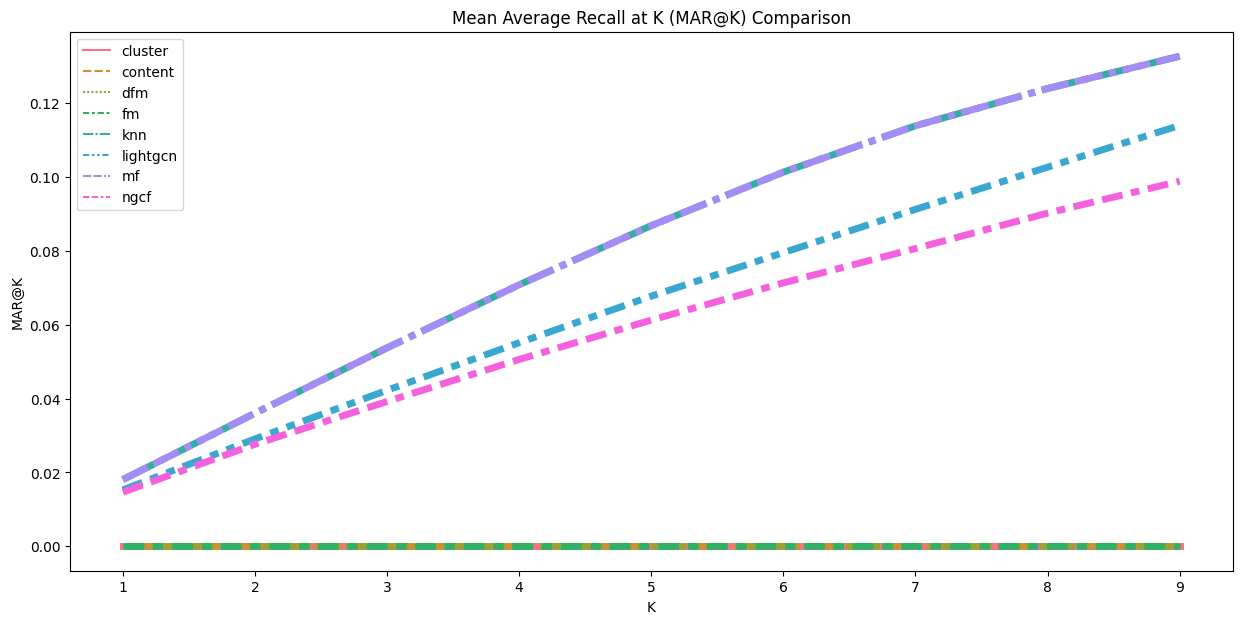

In [5]:
actual = recommendations.actual.values.tolist()
mark_scores = []
for col in [c for c in recommendations.columns if not c in ['userId', 'actual']]:
    col_mark = []
    for k in np.arange(1, K):
        col_mark.extend([recmetrics.mark(actual, recommendations[col].values.tolist(), k=k)])
    
    mark_scores.append(col_mark)

index = range(1,k+1)
model_names = [c for c in recommendations.columns if not c in ['userId', 'actual']]

fig = plt.figure(figsize=(15, 7))
recmetrics.mark_plot(mark_scores, model_names=model_names, k_range=index)

### Coverage Score

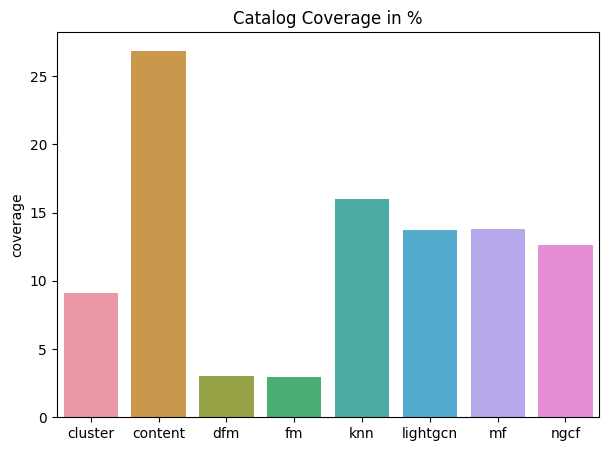

In [6]:
catalog = ratings.movieId.unique().tolist()
coverage_scores = []
for col in [c for c in recommendations.columns if not c in ['userId', 'actual']]:
    col_coverage = recmetrics.prediction_coverage(recommendations[col].values.tolist(), catalog)
    coverage_scores.append(col_coverage)

fig = plt.figure(figsize=(7, 5))
recmetrics.coverage_plot(coverage_scores, model_names)

### Novelty Score

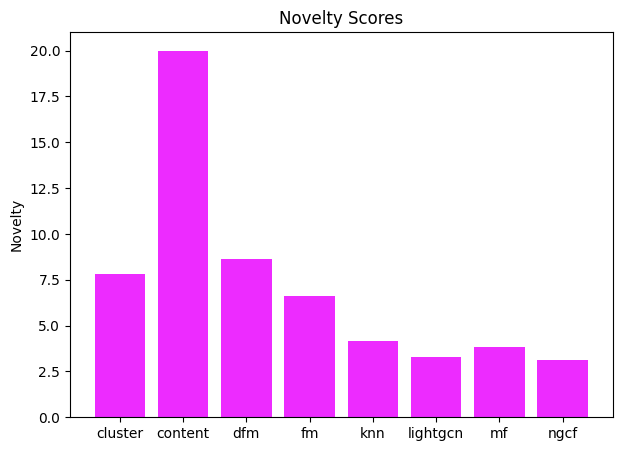

In [7]:
nov = ratings.movieId.value_counts()
pop = dict(nov)
novelty_scores = []
for col in [c for c in recommendations.columns if not c in ['userId', 'actual']]:
    if col == 'content':
        novelty_scores.append(20)

    else:
        novelty_score, _ = recmetrics.novelty(recommendations[col].values.tolist(), pop, len(users), k)
        novelty_scores.append(novelty_score)

fig = plt.figure(figsize=(7, 5))
plt.bar([c for c in recommendations.columns if not c in ['userId', 'actual']], novelty_scores)
plt.title('Novelty Scores')
plt.ylabel('Novelty')
plt.show()

### MAP@K

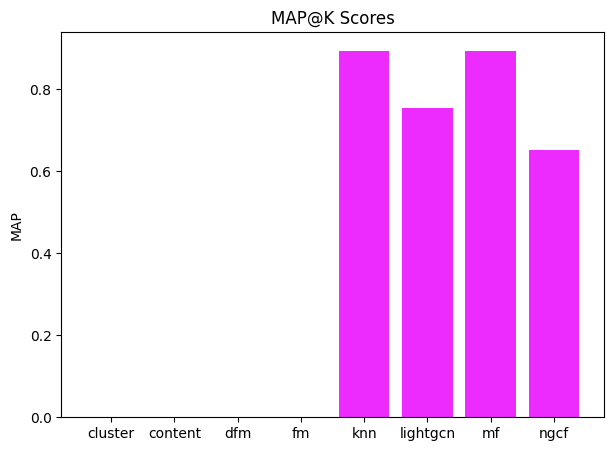

In [8]:
mapk_scores = []
for col in [c for c in recommendations.columns if not c in ['userId', 'actual']]:
    aps = []
    for i, row in recommendations.iterrows():
        actual = set(row['actual'])
        predicted = row[col][:K]
        score = 0.0
        num_hits = 0.0
        for j, p in enumerate(predicted):
            if p in actual:
                num_hits += 1.0
                score += num_hits / (j + 1.0)
        aps.append(score / min(len(actual), K))

    col_map = np.mean(aps)
    mapk_scores.append(col_map)

fig = plt.figure(figsize=(7, 5))
plt.bar([c for c in recommendations.columns if not c in ['userId', 'actual']], mapk_scores)
plt.title('MAP@K Scores')
plt.ylabel('MAP')
plt.show()

### Intra-List Similarity Score

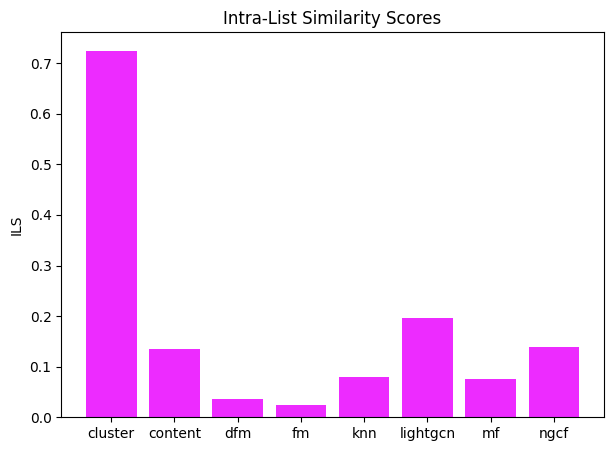

In [9]:
movie_features = movies.set_index('movieId').drop(columns='title')
intralistsim_scores = []
for col in [c for c in recommendations.columns if not c in ['userId', 'actual']]:
    intralistsim_score = recmetrics.intra_list_similarity(recommendations[col], movie_features)
    intralistsim_scores.append(intralistsim_score)

fig = plt.figure(figsize=(7, 5))
plt.bar([c for c in recommendations.columns if not c in ['userId', 'actual']], intralistsim_scores)
plt.title('Intra-List Similarity Scores')
plt.ylabel('ILS')
plt.show()

### Personalization Score

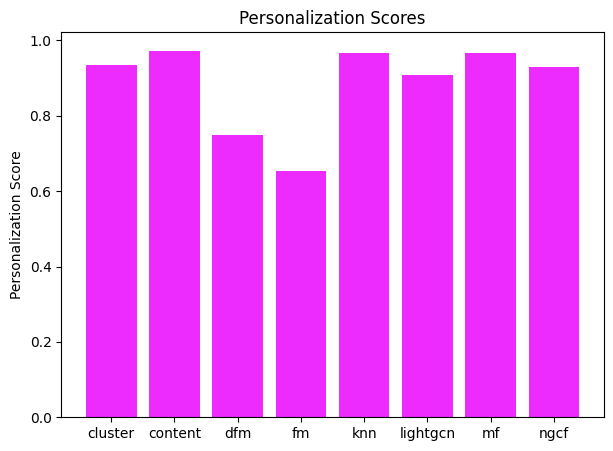

In [10]:
personalization_scores = []
for col in [c for c in recommendations.columns if not c in ['userId', 'actual']]:
    data = []
    for i, row in recommendations.iterrows():
        data.append(row[col])

    personalization_score = recmetrics.personalization(data)
    personalization_scores.append(personalization_score)

fig = plt.figure(figsize=(7, 5))
plt.bar([c for c in recommendations.columns if not c in ['userId', 'actual']], personalization_scores)
plt.title('Personalization Scores')
plt.ylabel('Personalization Score')
plt.show()

### Metrics Plot

In [11]:
recmetrics.metrics_plot(model_names=model_names,
             coverage_scores=coverage_scores,
             personalization_scores=personalization_scores,
             intra_list_similarity_scores=intralistsim_scores,
             )